In [9]:
import os, h5py
import numpy as np
import matplotlib.pyplot as plt

root = "F:/fastMRI/"
f_names = os.listdir(root)
print(f_names)

['file_brain_AXT2_200_2000020.h5', 'file_brain_AXT2_200_2000057.h5', 'file_brain_AXT2_200_2000080.h5', 'file_brain_AXT2_200_2000092.h5', 'file_brain_AXT2_200_2000173.h5', 'file_brain_AXT2_200_2000175.h5', 'file_brain_AXT2_200_2000290.h5', 'file_brain_AXT2_200_2000321.h5', 'file_brain_AXT2_200_2000332.h5', 'file_brain_AXT2_200_2000357.h5', 'file_brain_AXT1_201_6002717.h5', 'file_brain_AXT1_201_6002779.h5', 'file_brain_AXT1_201_6002836.h5', 'file_brain_AXT1_202_2020009.h5', 'file_brain_AXT1_202_2020076.h5']


In [6]:
h_file = h5py.File(f"{root}{f_names[0]}")

print(list(h_file.keys()))
print(list(h_file.attrs))

['ismrmrd_header', 'kspace', 'reconstruction_rss']
['acquisition', 'max', 'norm', 'patient_id']


In [7]:
print(h_file.attrs['max'], h_file.attrs['norm'])

0.0007465143011037355 0.16129497149750327


In [8]:
volume_kspace = h_file['kspace'][()]
print(volume_kspace.dtype)
print(volume_kspace.shape)

complex64
(16, 16, 768, 396)


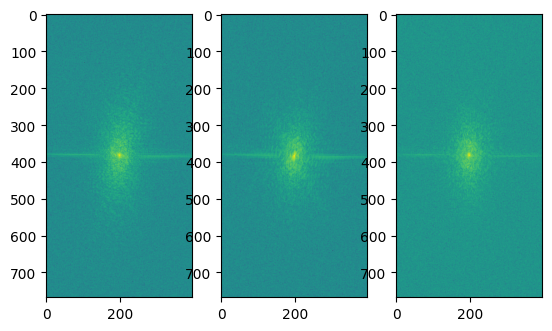

In [10]:
def visualize(data, slice_nums, cmap=None):
    fig = plt.figure()
    for i, num in enumerate(slice_nums):
        plt.subplot(1, len(slice_nums), i+1)
        plt.imshow(data[num], cmap=cmap)
    return

visualize(np.log(np.abs(volume_kspace[8]) + 1e-9), [0, 4, 8])

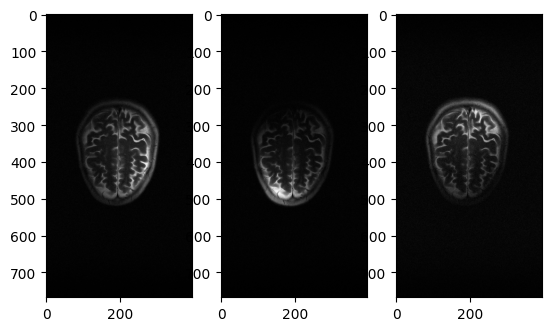

In [11]:
def ifft2(img, norm='ortho'):
    return np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(img), norm=norm))

visualize(np.abs(ifft2(volume_kspace[8])), [0, 4, 8], cmap='gray')

In [12]:
volume_rss = h_file['reconstruction_rss'][()]
print(volume_rss.dtype)
print(volume_rss.shape)

float32
(16, 384, 384)


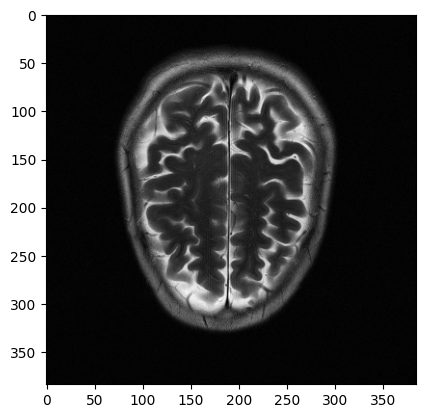

In [13]:
plt.imshow(volume_rss[8], cmap='gray')

In [36]:
import tifffile as tiff

A = tiff.imread("D:/Datasets/UCSD/UCSDped1/Train/Train001/001.tif")
B = tiff.imread("D:/Datasets/UCSD/UCSDped1/Train/Train001/002.tif")
print(A.shape)
print(B.shape)

(158, 238)
(158, 238)


In [43]:
A_flat = np.expand_dims(A.transpose().flatten(), axis=1)
B_flat = np.expand_dims(B.transpose().flatten(), axis=1)
print(A_flat.shape)
print(B_flat.shape)

(37604, 1)
(37604, 1)


In [45]:
AB = np.append(A_flat, B_flat, axis=1)
print(AB.shape)

(37604, 2)
